<a href="https://colab.research.google.com/github/muyale/PRODIGY_ML_02/blob/main/Kmeans_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:
df = pd.read_csv("/Mall_Customers.csv")

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.shape

(200, 5)

In [ ]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df['Gender'].value_counts().head() #  Most of our customers are female

Female    112
Male       88
Name: Gender, dtype: int64

# DATA VISUALIZATION

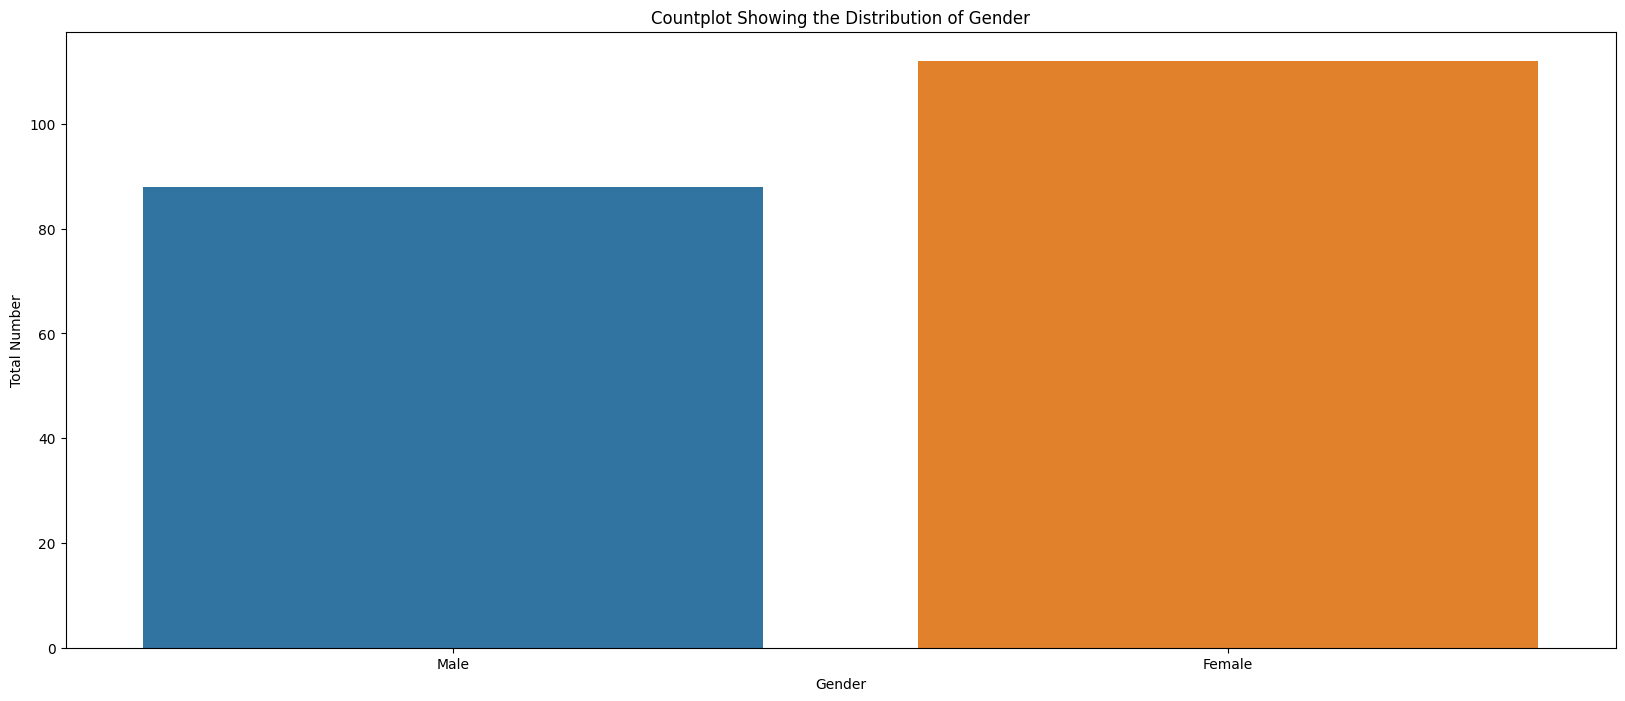

In [ ]:
fig = plt.figure(figsize=(20,8))
sns.countplot(x='Gender',data=df)
plt.ylabel("Total Number")
plt.title("Countplot Showing the Distribution of Gender")
plt.show()

In [ ]:
def  draw_histogram(column,df=df,color=None):
    fig = plt.figure(figsize=(20,8))
    sns.histplot(x=column,data=df,color=color,kde=True)
    plt.ylabel("Total Number")
    plt.title(f"Histogram Showing the Distribution of {column}")
    plt.show()

In [ ]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

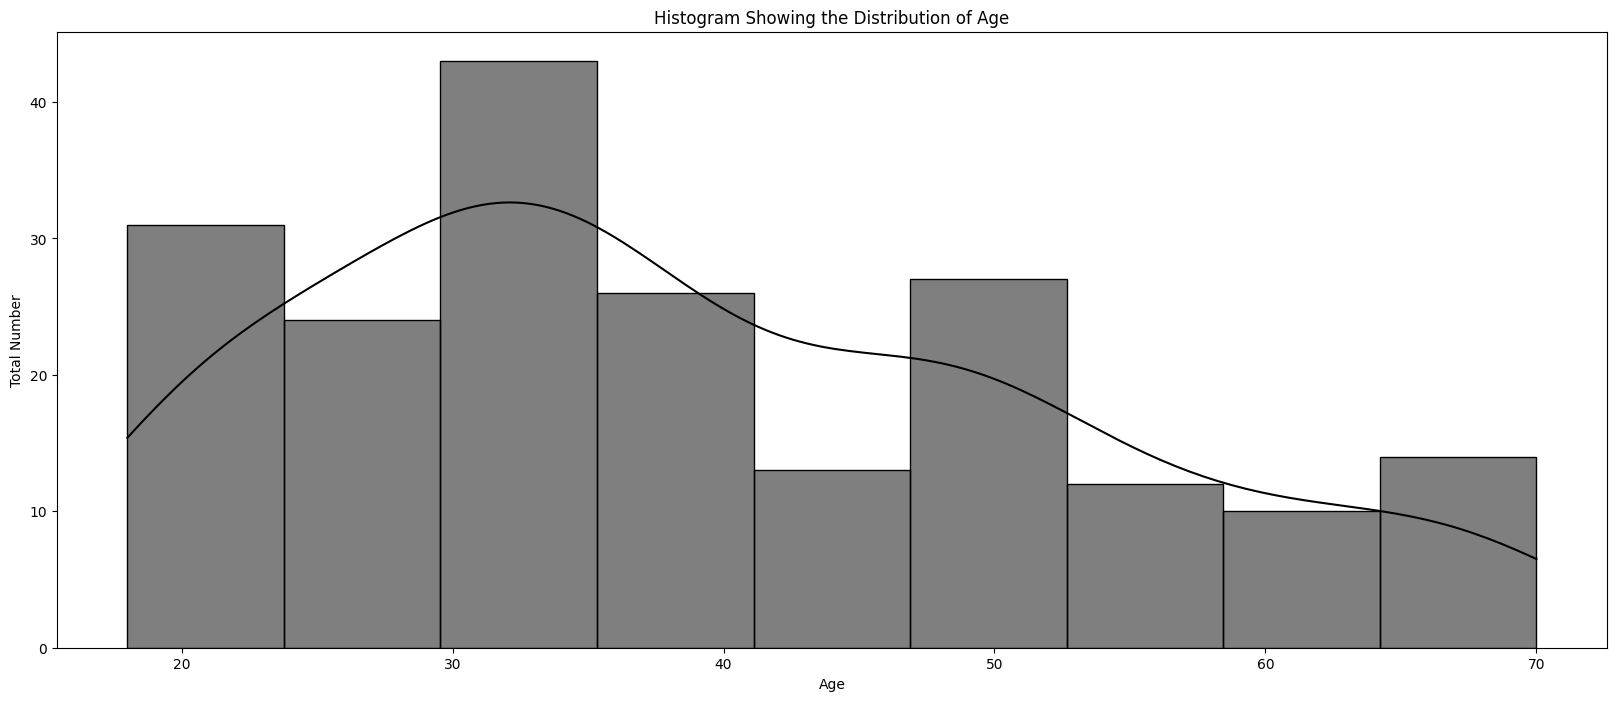

In [ ]:
# Lets see how age is distributed
draw_histogram("Age",color='black') # A lot of the customers are aged 35

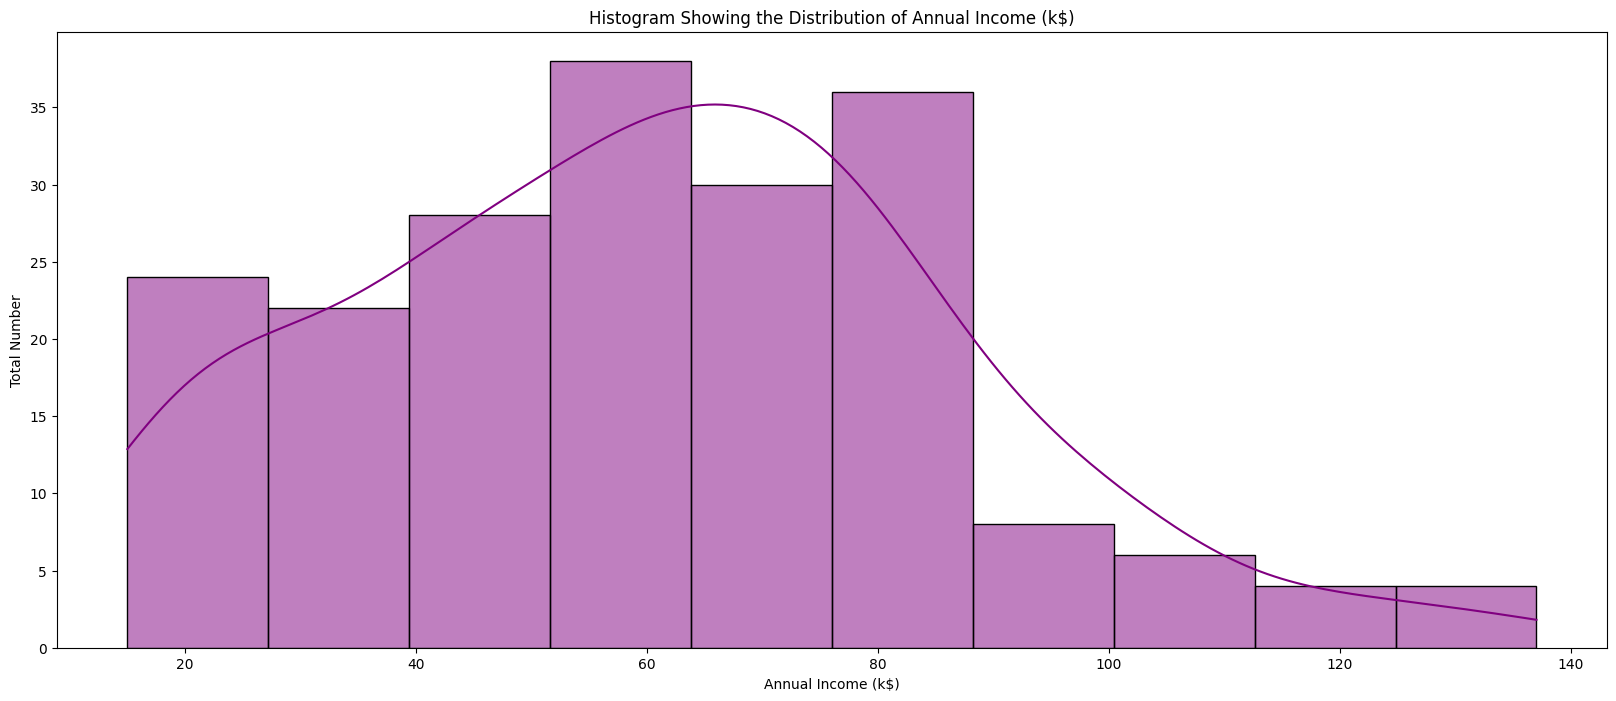

In [ ]:
draw_histogram('Annual Income (k$)',color='purple') # 60,000 dollar is the common income

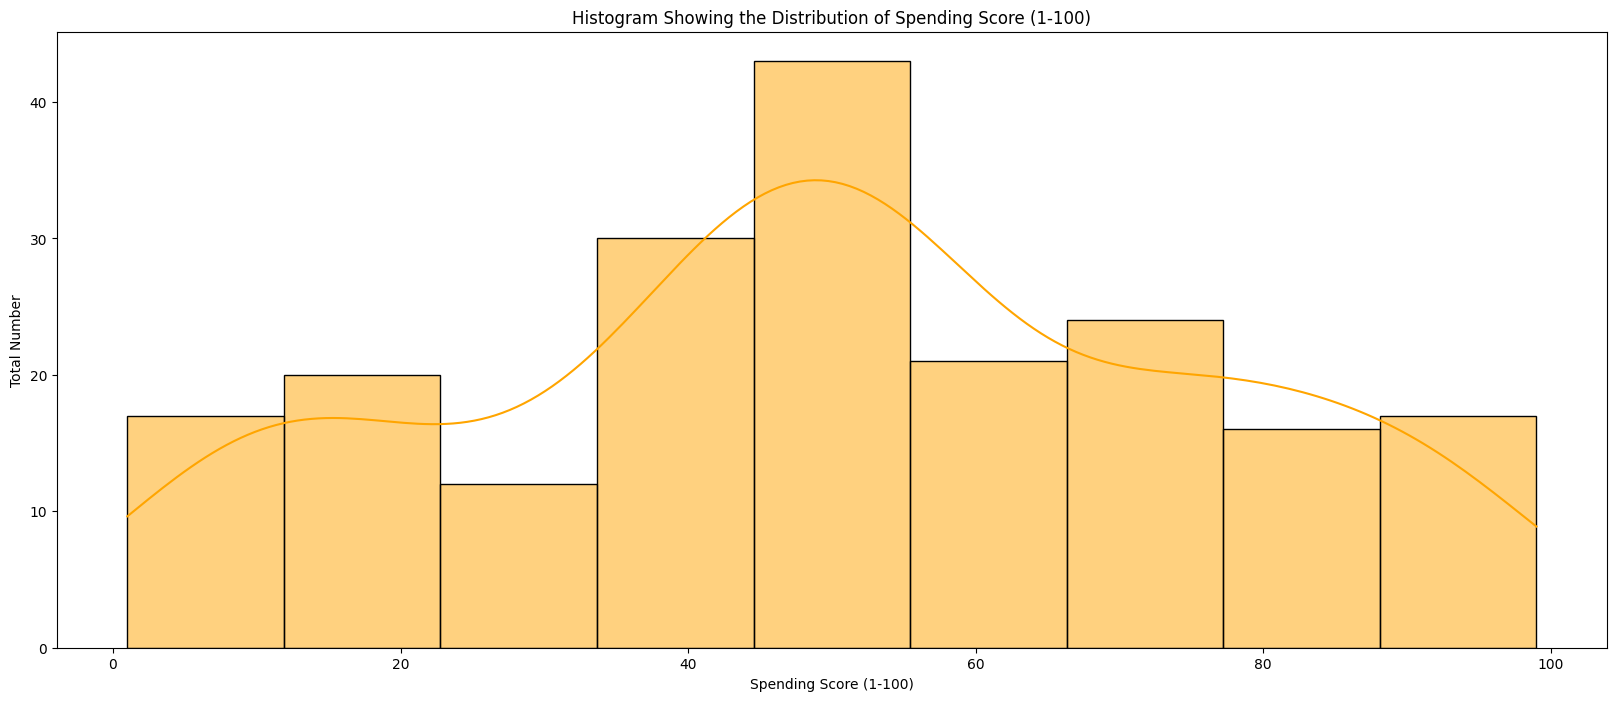

In [ ]:
draw_histogram('Spending Score (1-100)',color='orange') # A majority of the customers score 50 on spending

In [ ]:
def draw_jointplot(column1,column2,df=df,hue=None,color=None):
  fig = plt.figure(figsize=(20,8))
  sns.jointplot(x=column1,y=column2,data=df,color=color,hue=hue)
  plt.xlabel(column1)
  plt.ylabel(column2)
  plt.title(f"Jointplot Showing the Distribution of {column1}and {column2}")
  plt.show()

<Figure size 2000x800 with 0 Axes>

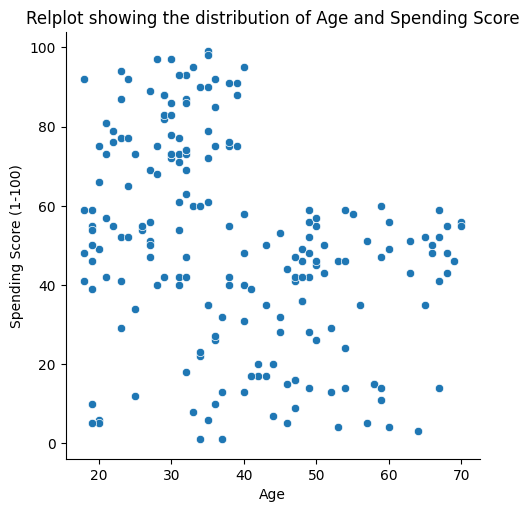

In [ ]:
plt.figure(figsize=(20,8))
sns.relplot(x = "Age",y = "Spending Score (1-100)",data=df)
plt.title("Relplot showing the distribution of Age and Spending Score")
plt.show()

<Figure size 2000x800 with 0 Axes>

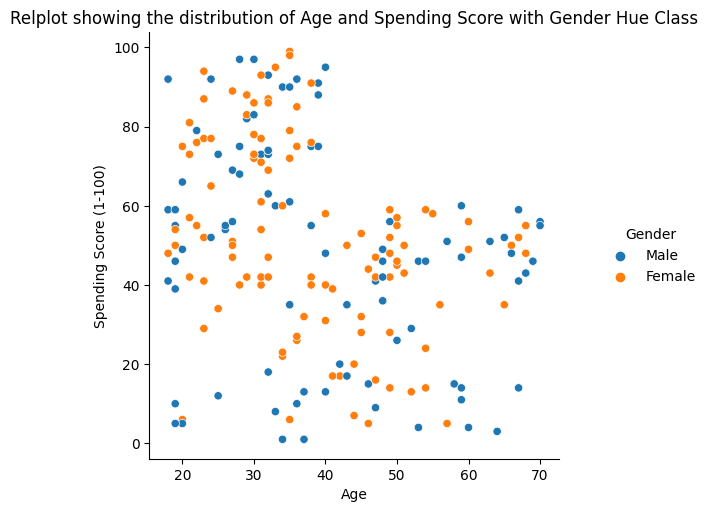

In [ ]:
fig = plt.figure(figsize=(20,8))
sns.relplot(x = "Age",y = "Spending Score (1-100)",data=df,hue='Gender')
plt.title("Relplot showing the distribution of Age and Spending Score with Gender Hue Class")
plt.show()

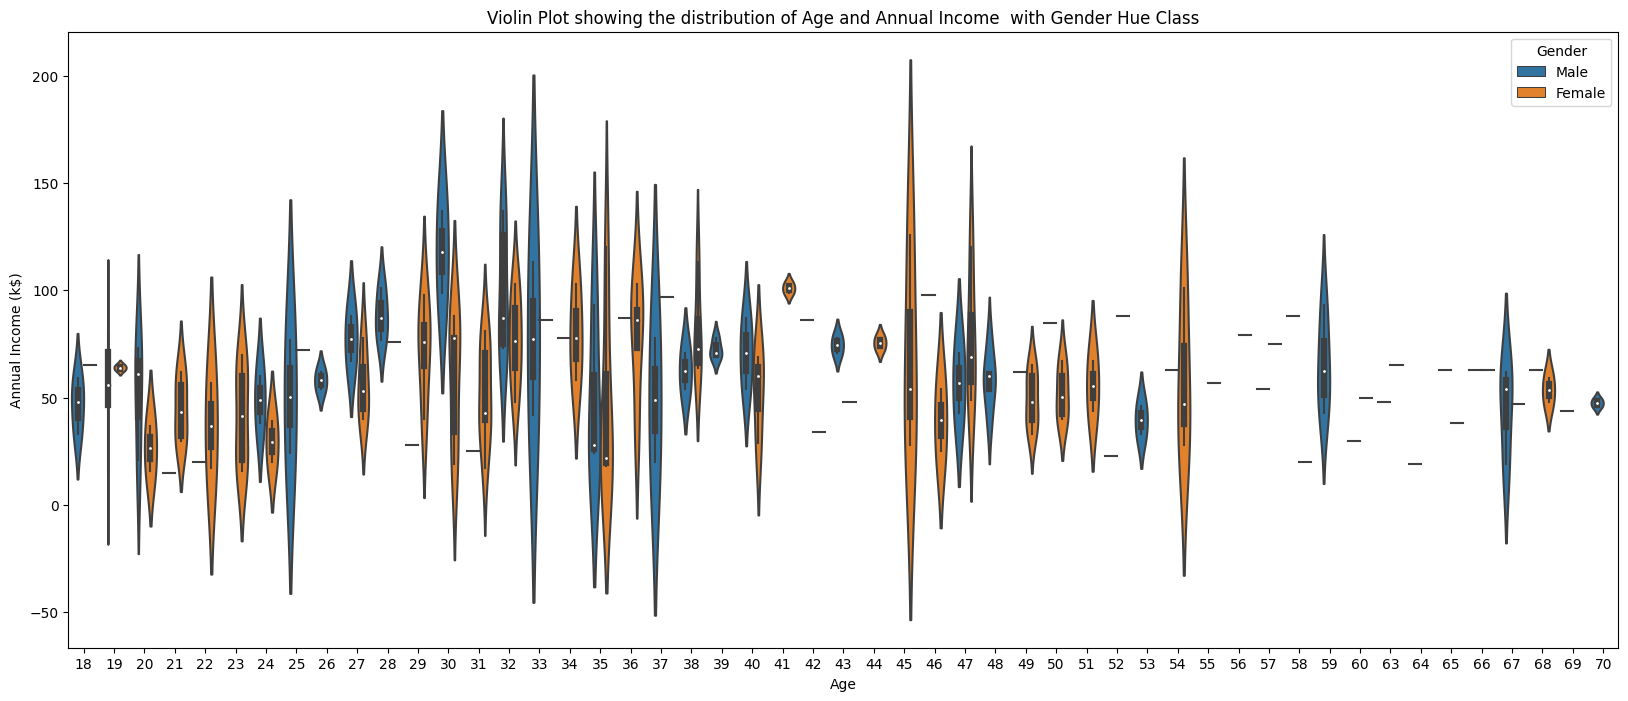

In [ ]:
fig = plt.figure(figsize=(20,8))
sns.violinplot(x = "Age",y = "Annual Income (k$)",data=df,hue='Gender')
plt.title("Violin Plot showing the distribution of Age and Annual Income  with Gender Hue Class")
plt.show()

<Figure size 2000x800 with 0 Axes>

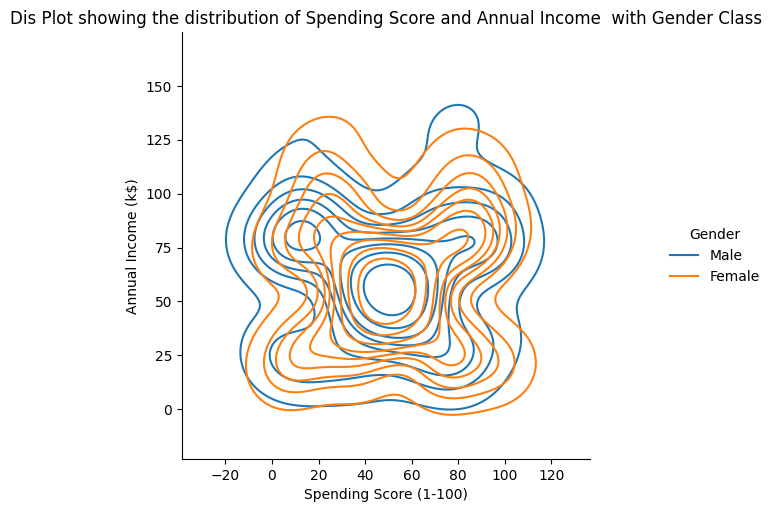

In [ ]:
fig = plt.figure(figsize=(20,8))
sns.displot(x = "Spending Score (1-100)",y = "Annual Income (k$)",data=df,hue='Gender',kind='kde')
plt.title("Dis Plot showing the distribution of Spending Score and Annual Income  with Gender Class")
plt.show()

# DATA PREPROCESSING

In [ ]:
# Convert my Gender values into machine readable format
from sklearn.preprocessing import LabelEncoder
lbl_encoder = LabelEncoder()
df['Gender'] = lbl_encoder.fit_transform(df['Gender'])

In [ ]:
df['Gender'].head()

0    1
1    1
2    0
3    0
4    0
Name: Gender, dtype: int64

In [ ]:
# scaling my data and selecting my X values
# Since this is clustering we do not need to have a target value
X  =  df.drop(['CustomerID'],axis=1)

In [ ]:
scaler = StandardScaler()
X =scaler.fit_transform(X)

In [ ]:
cluster_df =df[ ['Age','Gender','Annual Income (k$)','Spending Score (1-100)']]
cluster_df.columns =['Age','Gender','Annual Income (k$)','Spending Score (1-100)']
scaled_df = pd.DataFrame(cluster_df)

In [ ]:
scaled_df

,Age,Gender,Annual Income (k$),Spending Score (1-100)
0,19,1,15,39
1,21,1,15,81
2,20,0,16,6
3,23,0,16,77
4,31,0,17,40
...,...,...,...,...
195,35,0,120,79
196,45,0,126,28
197,32,1,126,74
198,32,1,137,18


[link text](https://)# CLUSTERING


In [ ]:
kmeans = KMeans(n_clusters= 4,max_iter=50)
kmeans.fit(cluster_df)
kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([3, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

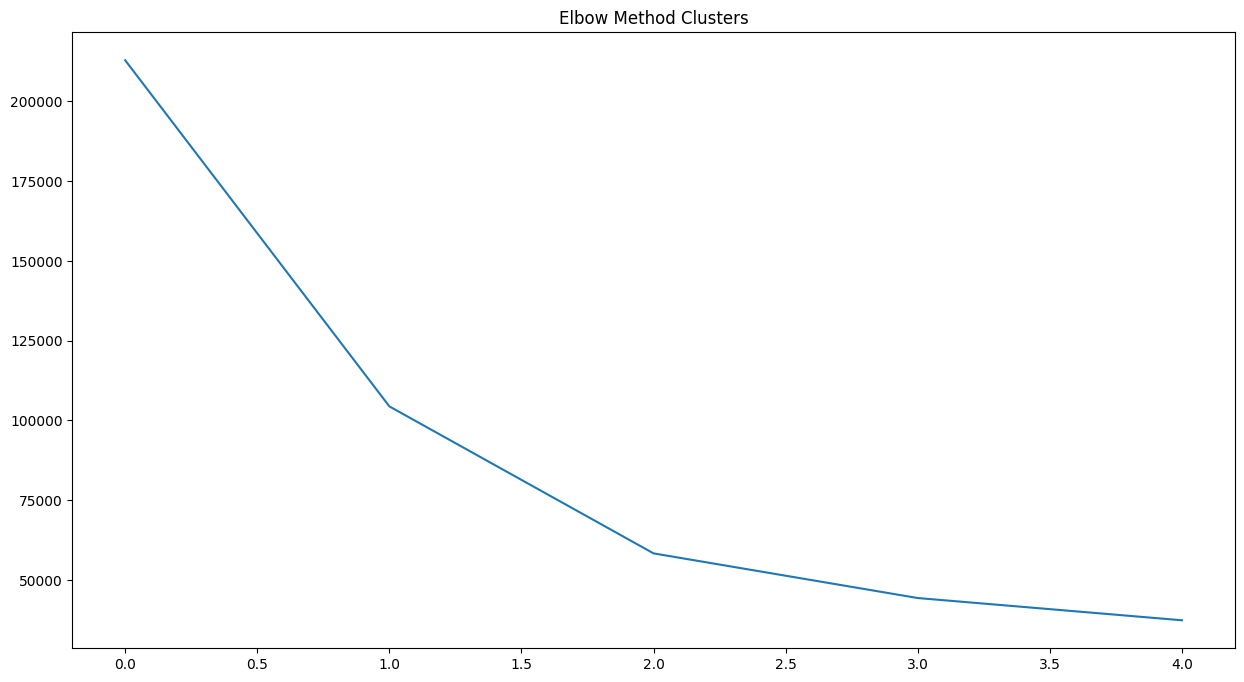

In [ ]:
# Using Elbow Method to get the number of clusters
clust = []
range_n_clusters = [2,4,6,8,10]
for num_clusters in range_n_clusters:
        kmeans = KMeans(n_clusters=num_clusters,max_iter=50)
        kmeans.fit(cluster_df)
        clust.append(kmeans.inertia_)

plt.figure(figsize=(15,8))
plt.title("Elbow Method Clusters")
plt.plot(clust)
plt.show()

# SILHOUETTE ANALYSIS



In silhoute analysis the value of the silhouete score ranges from -1 to 1 where a score point of 1 indicates that a data point
is very close to the other data point.



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For Cluster2 the silhouette_score is 0.29307334005502633
For Cluster4 the silhouette_score is 0.4052954330641215
For Cluster6 the silhouette_score is 0.45206493204632353
For Cluster8 the silhouette_score is 0.4259878450877001
For Cluster10 the silhouette_score is 0.3765912712716245


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


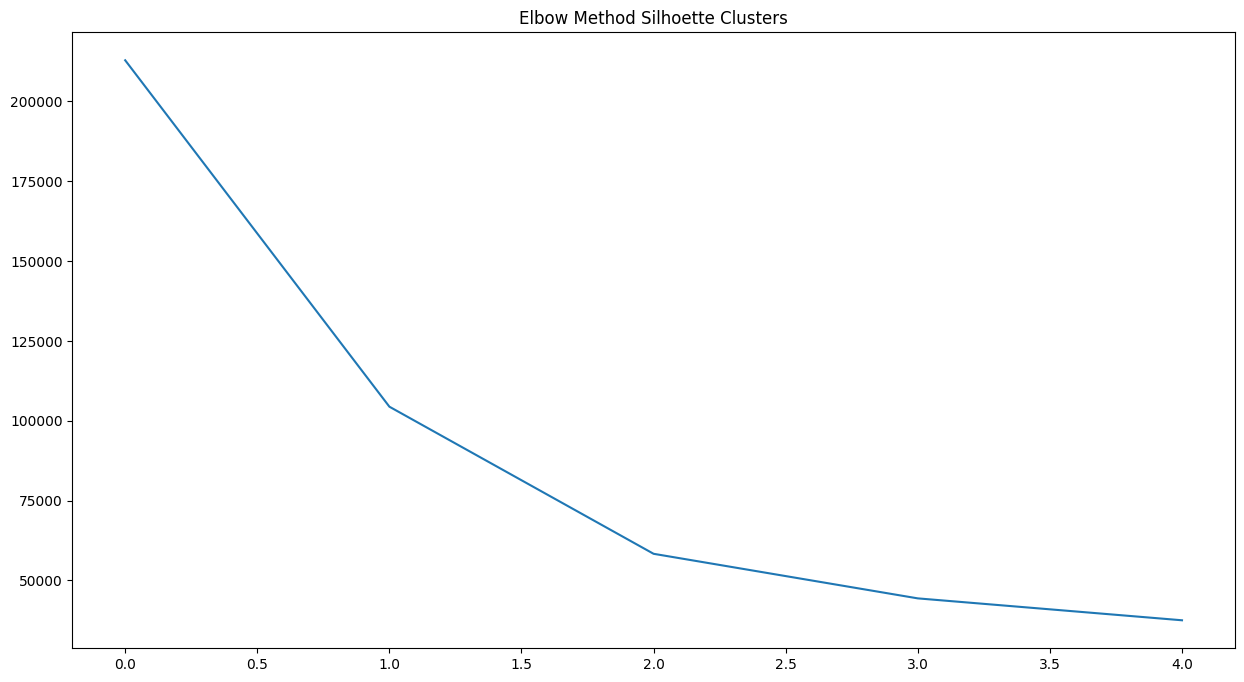

In [ ]:
from sklearn.metrics import silhouette_score
sill_h = []
range_n_clusters = [2,4,6,8,10]
for num_clusters in range_n_clusters:
        kmeans = KMeans(n_clusters=num_clusters,max_iter=50)
        kmeans.fit(scaled_df)
        cluster_labels = kmeans.labels_
        silhouette_avg = silhouette_score(scaled_df,cluster_labels)
        sill_h.append(kmeans.inertia_)
        print(f"For Cluster{num_clusters} the silhouette_score is {silhouette_avg}")

plt.figure(figsize=(15,8))
plt.title("Elbow Method Silhoette Clusters")
plt.plot(sill_h)
plt.show()

In [ ]:
cluster_df['Cluster_Id'] = kmeans.labels_

In [ ]:
cluster_df.head()

,Age,Gender,Annual Income (k$),Spending Score (1-100),Cluster_Id
0,19,1,15,39,7
1,21,1,15,81,0
2,20,0,16,6,2
3,23,0,16,77,0
4,31,0,17,40,7


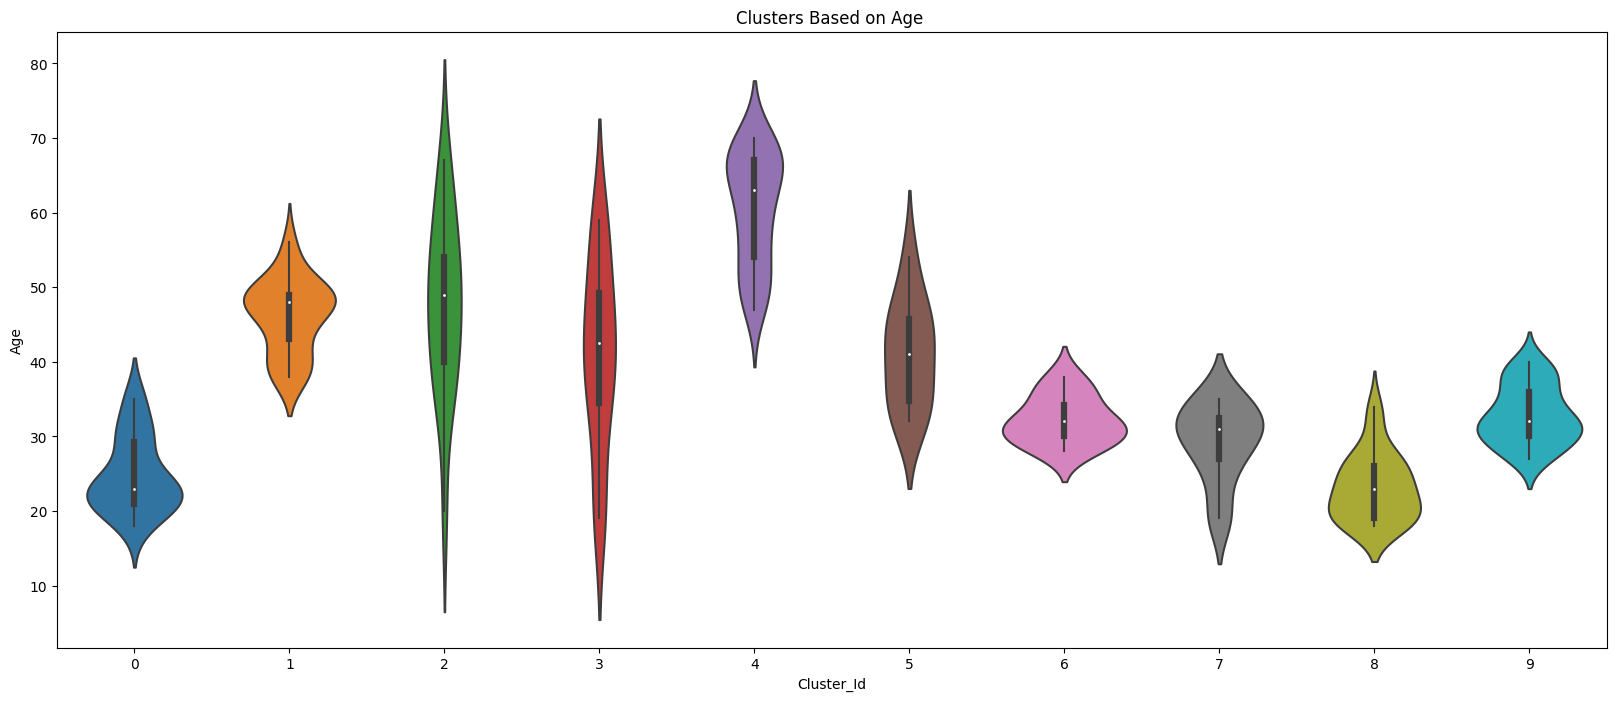

In [ ]:
plt.figure(figsize=(20,8))
sns.violinplot(x='Cluster_Id',y='Age',data=cluster_df)
plt.title('Clusters Based on Age ')
plt.show()

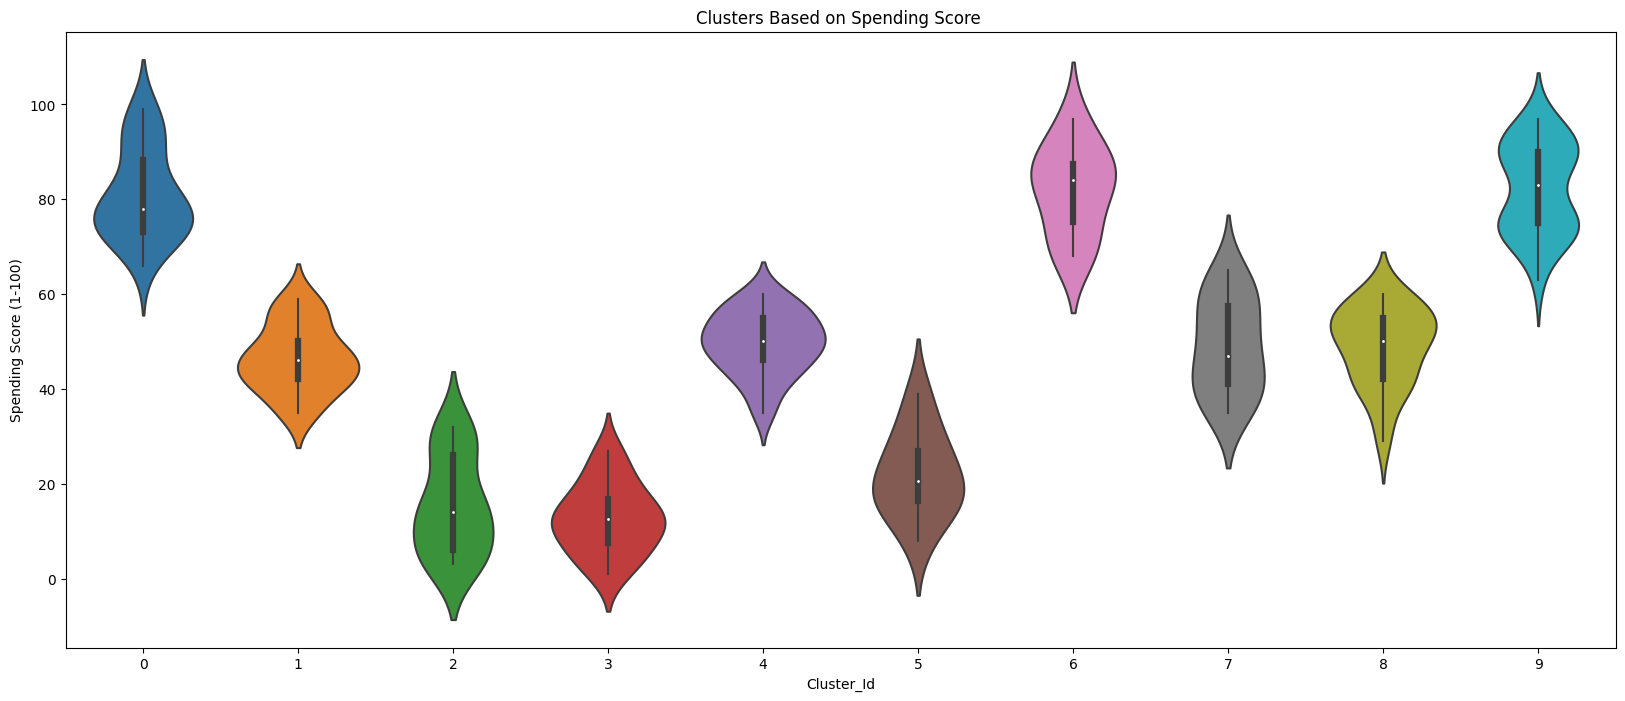

In [ ]:
plt.figure(figsize=(20,8))
sns.violinplot(x='Cluster_Id',y='Spending Score (1-100)',data=cluster_df)
plt.title('Clusters Based on Spending Score ')
plt.show()

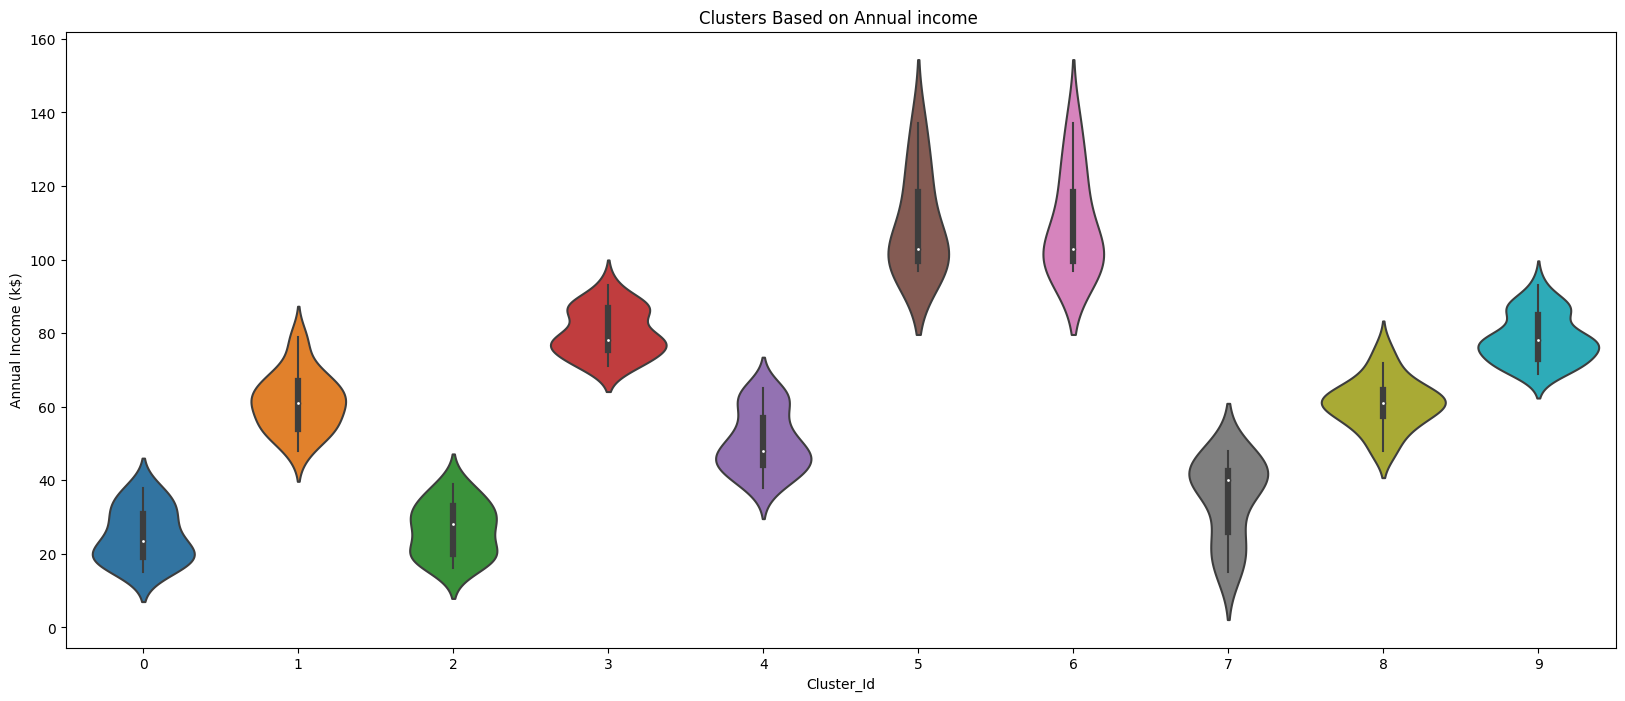

In [ ]:
plt.figure(figsize=(20,8))
sns.violinplot(x='Cluster_Id',y='Annual Income (k$)',data=cluster_df)
plt.title('Clusters Based on Annual income ')
plt.show()

In [ ]:
cluster_df['Cluster_Id'].nunique()

10

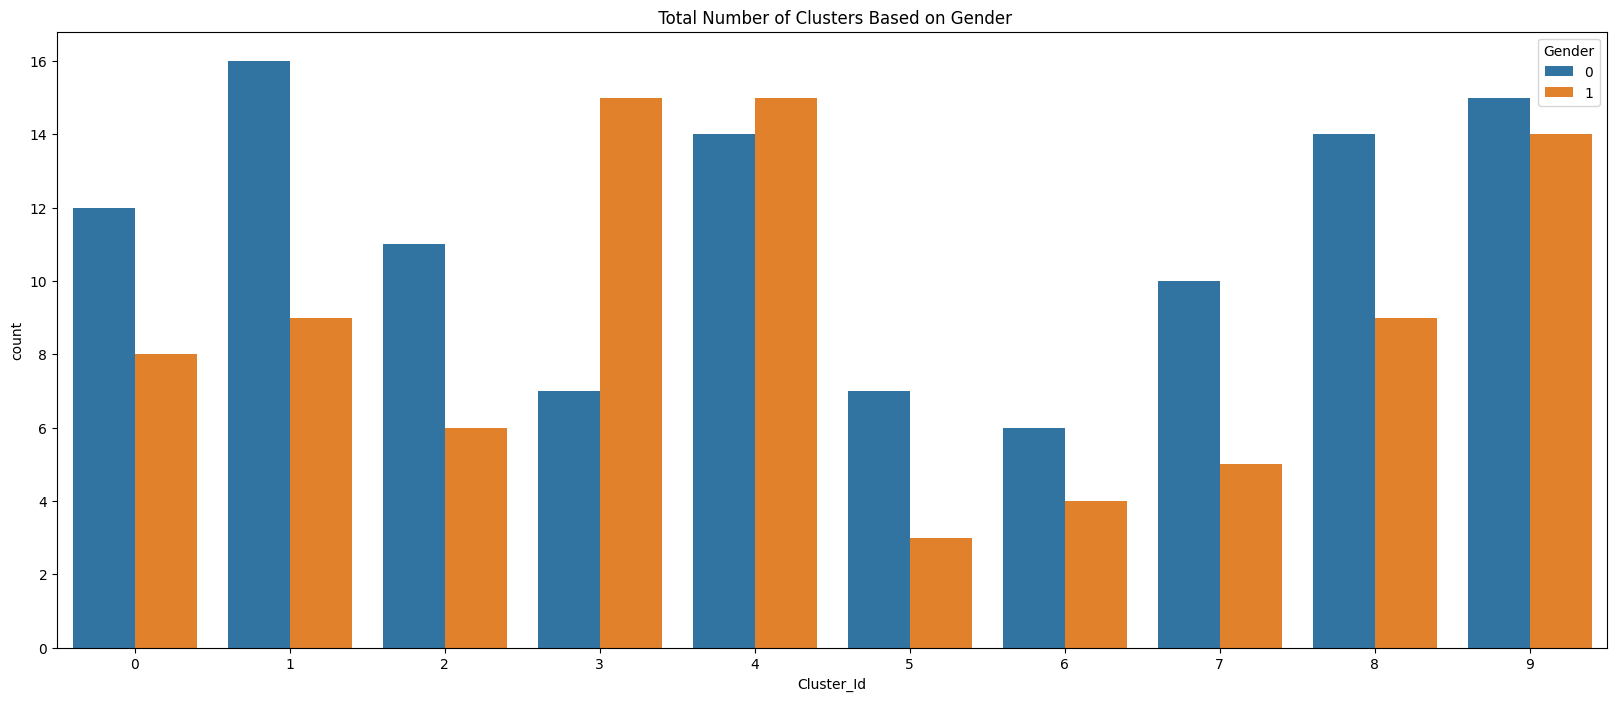

In [ ]:
plt.figure(figsize=(20,8))
sns.countplot(x='Cluster_Id',data=cluster_df,hue='Gender')
plt.title(' Total Number of Clusters Based on Gender')
plt.show() # There are A total of Ten Clusters

# CONCLUSION :
The Aim of the Project was to come up with a way to segment customers based on their purchasing history. Using clustering
I achieved this ,I first had to see if there was some relationship between the variables which I found.the next task was to scaled
the data and then create a dataframe that had all the clusters. I came up with a total of 10 clusters .

This was a really great project ;